In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import math
import importlib

In [8]:
from  standards import *
import Monte_Carlo as MC
import life_cycle_assessment as lc


importlib.reload(MC)

importlib.reload(lc)

Folder name Results created
Folder name Results created


<module 'life_cycle_assessment' from 'c:\\Users\\ruw\\Desktop\\RA\\Single-use-vs-multi-use-in-health-care\\Brighway\\life_cycle_assessment.py'>

In [2]:
file = r'Data.xlsx'
sheet = 'RS total net savings'
save_dir = r'Hospital_CDU_MDU'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
data = pd.read_excel(file, sheet_name=sheet)

In [3]:
header = data.columns
header = header[0:6]
header_df = data[header[0:6]]

columns_to_drop = [col for col in header_df.columns if 'Unnamed:' in col]
header_df = header_df.drop(columns=columns_to_drop)
header = header_df.columns


In [4]:

data_col = data.columns
data_plotting = data_col[14:-1]
df = data[data_plotting]

# Filter columns containing 'Use emissions' or 'impact' in their names
columns_to_drop = [col for col in df.columns if 'Use emissions' in col or 'impact' in col]

# Drop filtered columns
df = df.drop(columns=columns_to_drop)
df_col = df.columns


In [5]:

plot_legend = [ 'RSMDU',
               'RSCDU',
                'RSPDU ',
                'RSREC',
                'RSBASE']



counter = 0

In [ ]:
temp = [0] * 11
colors = plot_colors(temp,'turbo')

C:\Users\ruw\AppData\Local\Temp\8\ipykernel_17356\2719210740.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')
C:\Users\ruw\AppData\Local\Temp\8\ipykernel_17356\2719210740.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


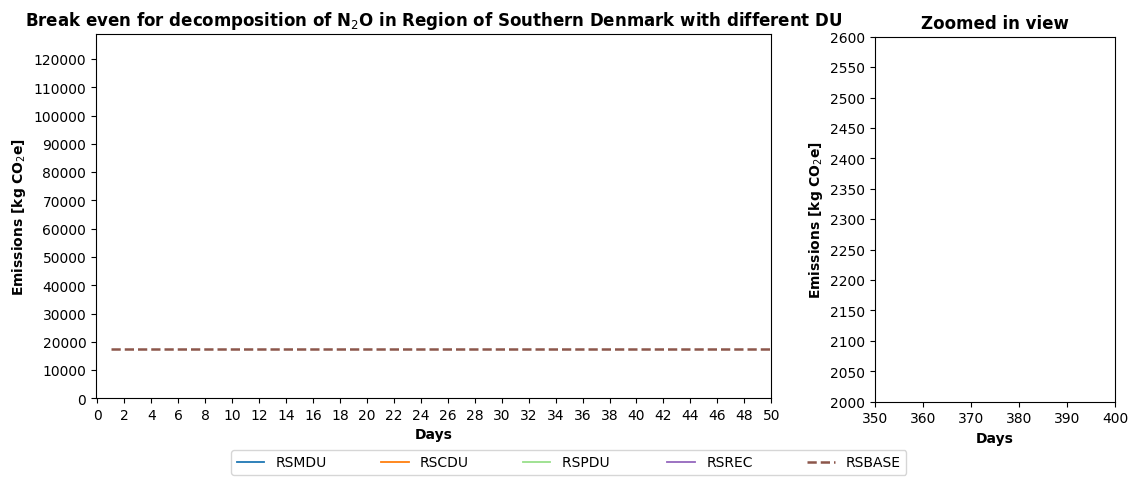

In [6]:
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]

fig, ax = plt.subplots(figsize=(8, 5))
counter = 0
plot_handles = []  # List to store plot handles
plot_labels = []  # List to store labels

# Plotting the columns
for i in range(0, len(df_col), 2):
    line, = ax.plot(data['Days'], data[df_col[i]], color=colors[counter], label=df_col[i], linewidth=1.3)
    plot_handles.append(line)
    plot_labels.append(df_col[i])
    counter += 1

# Plotting the dashed line
dashed_line, = ax.plot(data['Days'], data['Emissions (no MDU) tot'], color=colors[4], linestyle='dashed', label='Emissions (no MDU) tot', linewidth=1.8)
plot_handles.append(dashed_line)
plot_labels.append('Emissions (no MDU) tot')

# Axis labels and title
ax.set_ylabel('Emissions [kg CO$_2$e]', weight='bold')
ax.set_xlabel('Days', weight='bold')

# Axis limits
ax.set_xlim(-0.1, 30)
ax.set_ylim(0, 129000)

# Set x-axis and y-axis ticks
ax.set_xticks(np.arange(0, 51, step=2))
ax.set_yticks(np.arange(0, 129001, step=10000))
ax.set_title('Break even for decomposition of N$_2$O in Region of Southern Denmark with different DU', weight='bold')

# Legend
ax.legend(plot_handles, plot_legend, bbox_to_anchor=(0.2, -0.21, 1, 0.2), loc="lower left",
          mode="expand", borderaxespad=0, ncol=5)


# Inset axis for zoomed-in view
ax_inset = fig.add_axes([1.1, 0.185, 0.3, 0.73])  # Adjust position and size as needed
for i in range(0, len(df_col), 2):
    ax_inset.plot(data['Days'], data[df_col[i]], color=colors[i//2], linewidth=1.3)
ax_inset.plot(data['Days'], data['Emissions (no MDU) tot'], color=colors[4], linestyle='dashed', linewidth=1.8)

ax_inset.set_xlim(350, 400)
ax_inset.set_ylim(2000, 2600)
ax_inset.set_xticks(np.arange(350, 401, step=10))
ax_inset.set_yticks(np.arange(2000, 2601, step=50))
ax_inset.set_title('Zoomed in view', weight='bold')
# Axis labels and title
ax_inset.set_ylabel('Emissions [kg CO$_2$e]', weight='bold')
ax_inset.set_xlabel('Days', weight='bold')

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'break_even_total_RS.jpg'), bbox_inches='tight')
plt.show()


In [7]:
# Select the range A51:M51
cost_pr_ton = data.iloc[13:14, 1:5]

In [8]:
data = pd.read_excel(file, sheet_name=sheet)
col = data.columns
col = col[1:5]
lst = np.zeros(len(col))
for i in range(len(col)):
    lst[i] = cost_pr_ton[col[i]]
    

C:\Users\rwint\AppData\Local\Temp\ipykernel_16040\2658485199.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lst[i] = cost_pr_ton[col[i]]


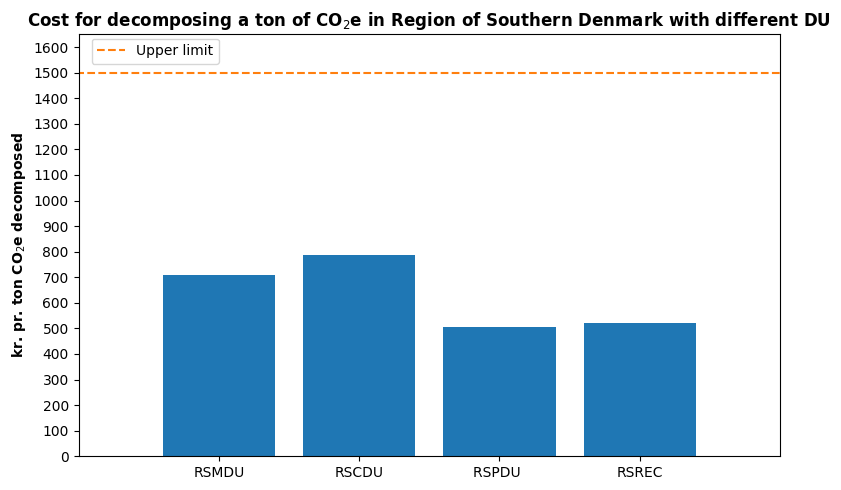

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(plot_legend[:-1], lst, color=colors[0]) 


plt.xlim(-1, 4)

# Set y-axis limits and ticks for the primary y-axis
ax.set_ylim(0, 1650)
ax.set_yticks(np.arange(0, 1601, step=100))

# Draw a horizontal line
ax.hlines(1500, xmin=-5, xmax=4, color=colors[1], linestyle='dashed')

plt.ylabel('kr. pr. ton CO$_2$e decomposed', weight='bold')
plt.title('Cost for decomposing a ton of CO$_2$e in Region of Southern Denmark with different DU', weight='bold')
ax.legend(['Upper limit'], loc='upper right', bbox_to_anchor=(0.2, 0.99), borderaxespad=0,)
# Add legend for the dashed line

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'comparison_cost_pr_ton_recomenneded.jpg'), bbox_inches='tight')
plt.show()